In [6]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
alpha = 0.9
beta = 0.2
gamma = 0.1

Gamma = np.array([[1-gamma, 0, gamma], [0, 1-gamma, gamma], [beta/2, beta/2, 1-beta]])
            

Z_given_C = np.array([1-alpha, alpha, 0.5])

In [8]:
stats.bernoulli(0.5).rvs(size=[2,2])

array([[1, 1],
       [1, 0]], dtype=int64)

In [9]:
xk = np.arange(3)
C_transitition = [
        stats.rv_discrete(values=(xk,Gamma[0,])),
        stats.rv_discrete(values=(xk,Gamma[1,])),
        stats.rv_discrete(values=(xk,Gamma[2,])),
    ]

Z_given_C[C_transitition[2].rvs(size=100)]



array([0.5, 0.9, 0.5, 0.5, 0.9, 0.5, 0.5, 0.1, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.9, 0.5, 0.9, 0.5, 0.1, 0.5, 0.1, 0.5,
       0.5, 0.9, 0.5, 0.9, 0.5, 0.5, 0.1, 0.5, 0.5, 0.5, 0.1, 0.5, 0.5,
       0.5, 0.9, 0.5, 0.5, 0.5, 0.5, 0.9, 0.1, 0.5, 0.5, 0.5, 0.1, 0.5,
       0.9, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.1, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.1, 0.5, 0.9, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.1, 0.5, 0.5, 0.5])

In [10]:
def sim(n=1000, T=1000, alpha = 0.9, beta = 0.2, gamma = 0.1, lamb0=1, lamb1=5):
    #xk = np.arange(3)   
    Gamma = np.array([[1-gamma, 0, gamma], 
                      [0, 1-gamma, gamma], 
                      [beta/2, beta/2, 1-beta]])
    C_transition = [
        stats.rv_discrete(values=(xk,Gamma[0,])),
        stats.rv_discrete(values=(xk,Gamma[1,])),
        stats.rv_discrete(values=(xk,Gamma[2,])),
    ]
    C = np.zeros(T, np.int64)
    C[0] = 2
    for i in range(T-1):
        C[i+1] = C_transition[C[i]].rvs()
    Z_given_C = np.array([1-alpha, alpha, 0.5]) 
    Z = stats.bernoulli(Z_given_C[C]).rvs(size=[n,T])
    X = stats.poisson(np.where(Z, lamb1, lamb0)).rvs()
    return C,Z,X


C, Z, X = sim(10, 100)

<Axes: >

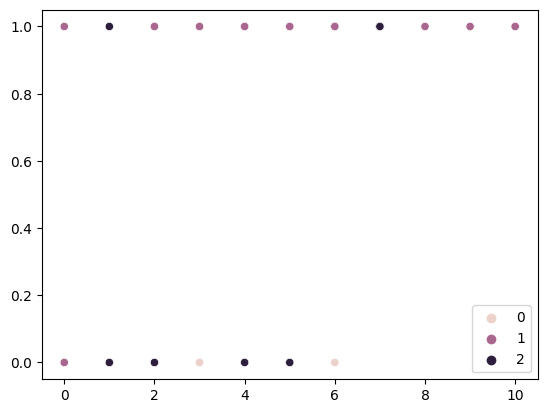

In [11]:
import seaborn as sns
sns.scatterplot(x=X[0],y=Z[0], hue=C)

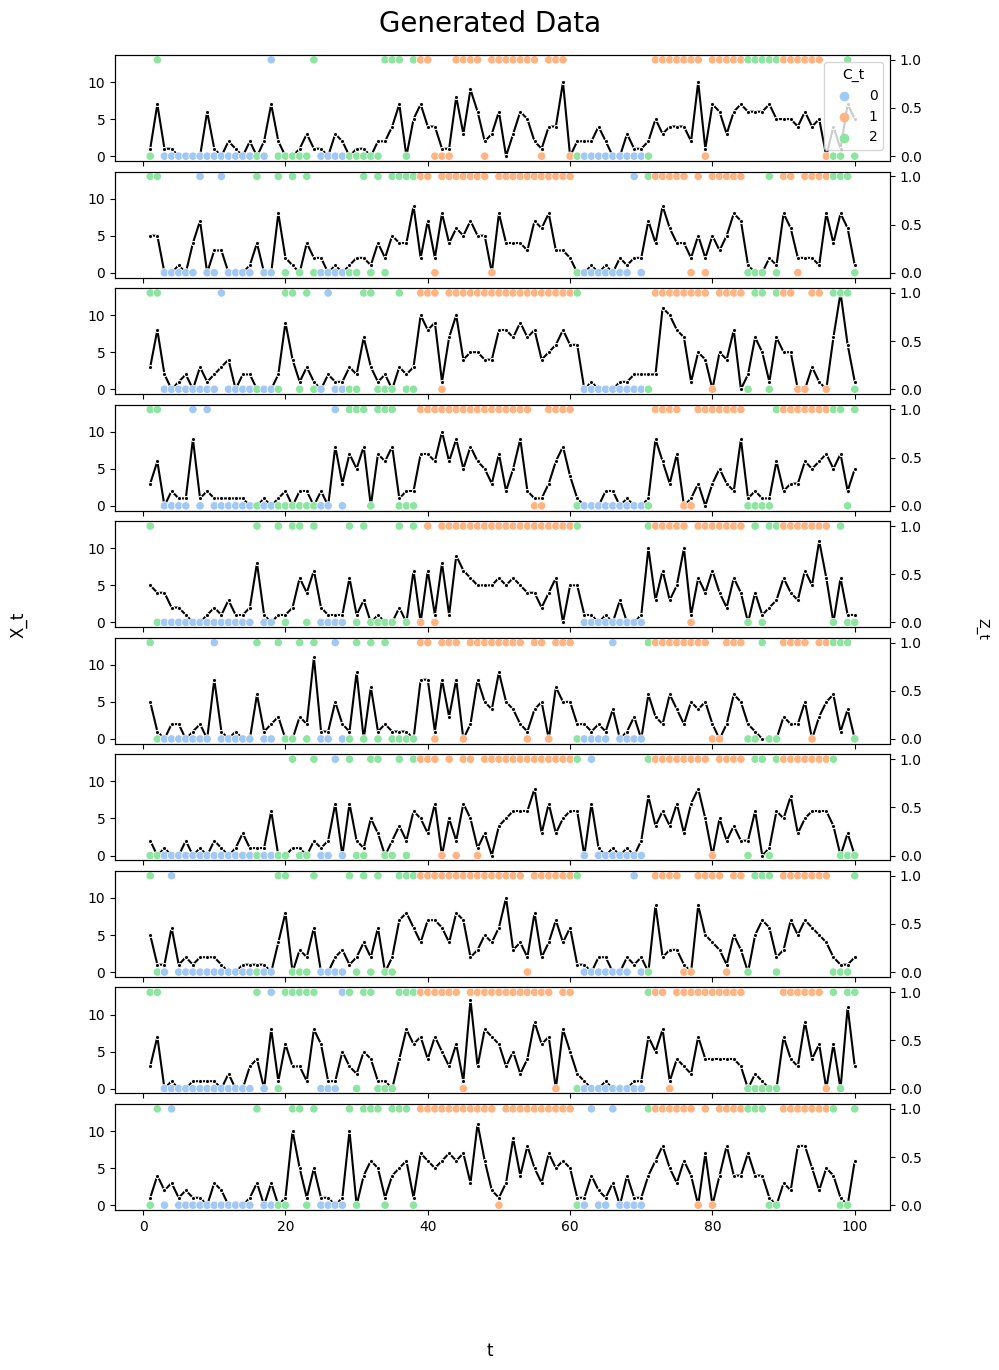

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('bright')

fig, axs = plt.subplots(10,1, sharey=True, figsize = (10,15))

x_plot = list(range(1, 100+1))

for i in range(10):
    y_plot = X[i]
    z_plot = Z[i]
    sns.lineplot(x=x_plot, y=y_plot, marker='o', markersize=3, color='black', ax=axs[i], legend=False)#, label='X')
    axs_ = axs[i].twinx()
    if i == 0:
        sns.scatterplot(x=x_plot, y=z_plot, marker='o', ax=axs_, hue=C, palette = 'pastel', legend=True)#, label='Z')
        plt.legend(title = 'C_t')
    else:
        sns.scatterplot(x=x_plot, y=z_plot, marker='o', ax=axs_, hue=C, palette = 'pastel', legend=False)#, label='Z')
        
fig.suptitle('Generated Data', fontsize=20, y = 0.91)
fig.supxlabel('t')
fig.supylabel('X_t')

plt.text(117, 5.9, 'Z_t', rotation = 270)

plt.subplots_adjust(hspace = 0.1)

#plt.tight_layout()
plt.show()


# TRASH

In [ ]:
# fig, axs = plt.subplots(10, 1, figsize= (6.5, 8))
# x_plot = list(range(1,100+1))
# col = ("red", "green", "blue")
# color_list = [col[i] for i in C]

# for i in range(10):
#     y_plot = X[i]
#     z_plot = Z[i]*10
#     axs[i].plot(x_plot, y_plot, marker='o', markersize=3, color='black')
#     axs[i].plot(x_plot, z_plot, c=color_list)

# fig.suptitle('Generated Data', fontsize=16)
# fig.supxlabel('t')
# fig.supylabel('X_t')

# plt.tight_layout()
# plt.legend()
# plt.show()

In [ ]:
# OLD CODE

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('bright')


fig, axs = plt.subplots(10, 1, figsize=(10, 15))
x_plot = list(range(1, 100+1))
col = ["red", "green", "blue"]
color_list = [col[i] for i in C]

for i in range(10):
    y_plot = X[i]
    z_plot = Z[i]* 10
    sns.lineplot(x=x_plot, y=y_plot, marker='o', markersize=3, color='black', ax=axs[i], legend=False)#, label='X')
    sns.scatterplot(x=x_plot, y=z_plot, marker='o', ax=axs[i], hue=color_list, legend=False)#, label='Z')


fig.suptitle('Generated Data', fontsize=16)
fig.supxlabel('t')
fig.supylabel('X_t')

plt.subplots_adjust(hspace = 0.1)

#plt.tight_layout()
plt.show()


In [2]:
# Parameters
alfa = 0.9
beta = 0.2
gamma = 0.1
lambda0 = 1
lambda1 = 5

In [3]:
def forward_simulation(N=10, T=100):
    
    c_states = [0,1,2]
    
    # T1 C is 1
    
    c_list = [2]
    
    # Generate C's
    
    for c in range(T-1):
        
        previous_c = c_list[-1]
            
        if previous_c == 2:

            c = random.choices(c_states, weights=(beta/2,beta/2,1-beta), k=1)

        elif previous_c == 1:

            c = random.choices(c_states, weights=(0,1-gamma,gamma), k=1)

        elif previous_c == 0:

            c = random.choices(c_states, weights=(1-gamma,0,gamma), k=1)
            

        c_list.append(c[0])                

    # Generate Z
    
    Zdf = pd.DataFrame()
    
    z_states = [0,1]
    
    
    for number, c_ in enumerate(c_list):
                
        if c_ == 0:
            
            z = random.choices(z_states, weights=(alfa, 1-alfa), k=N)
                        
        elif c_ == 1:
            
            z = random.choices(z_states, weights=(1-alfa, alfa), k=N)
                        
            
        elif c_ == 2:

            z = random.choices(z_states, weights=(0.5, 0.5), k=N)
        
        columnname = 't'+ str(number)
        Zdf[columnname] = z
    
    Znp = Zdf.to_numpy()
    
    
    Znp = Znp.T.copy() # row is T, Column is N
    
    
    # Generate X

    X = []
    
    for row in Znp:
        
        xs = []
        
        for obs in row:
                        
            if obs == 1:
                
                x = np.random.poisson(lam = lambda1, size = 1)

            elif obs == 0:

                x = np.random.poisson(lam = lambda0, size = 1)

            xs.append(x[0])
            
        X.append(xs)
        
        Xnp = np.array(X)
        
                    
    
    return np.array(c_list), Znp, Xnp
    
    
    
    
    
    
    

In [4]:
C, Z, X = forward_simulation()



### Visualization

In [5]:
res = np.array([sum(idx) for idx in zip(*X.T)])
res = res/10

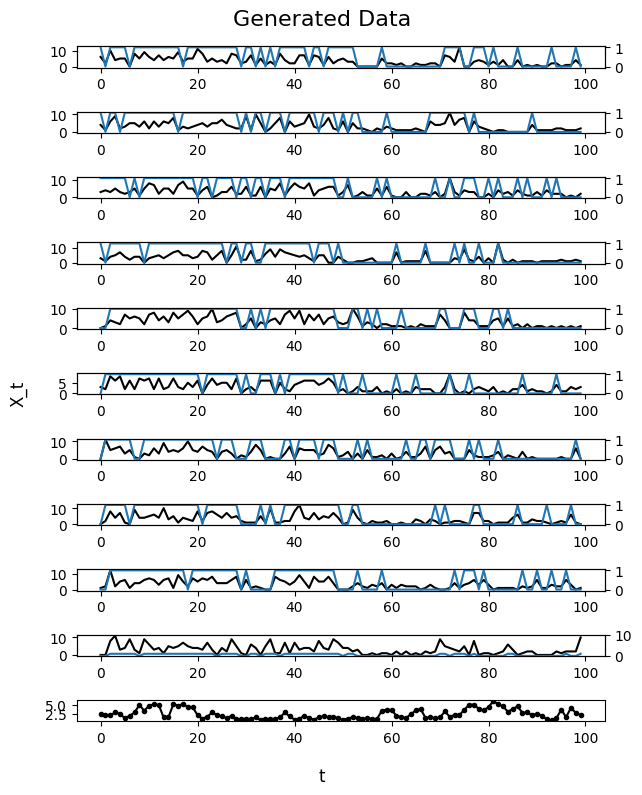

In [34]:
fig, axs = plt.subplots(11, 1, figsize= (6.5, 8))
x_plot = list(range(0,100))

for i in range(10):
    y_plot = X.T[i]
    z_plot = Z.T[i]
    axs[i].plot(x_plot, y_plot, markersize=3, color='black')
    axs[i] = axs[i].twinx()
    axs[i].plot(x_plot, z_plot)


axs[10].plot(x_plot, res, marker='o', markersize=3, color='black') # Adding a mean

plt.ylim((0,10))


fig.suptitle('Generated Data', fontsize=16)
fig.supxlabel('t')
fig.supylabel('X_t')

plt.tight_layout()
plt.show()

### logistic regression

In [7]:
C, Z, X = forward_simulation(10, 100)

In [8]:
X.shape

(100, 10)

In [11]:
len(X.T)

10

In [12]:
from scipy import stats

slopes = []
for t in X.T:
    slope, intercept, r, p, std_err = stats.linregress(C,t)
    slopes.append(slope)